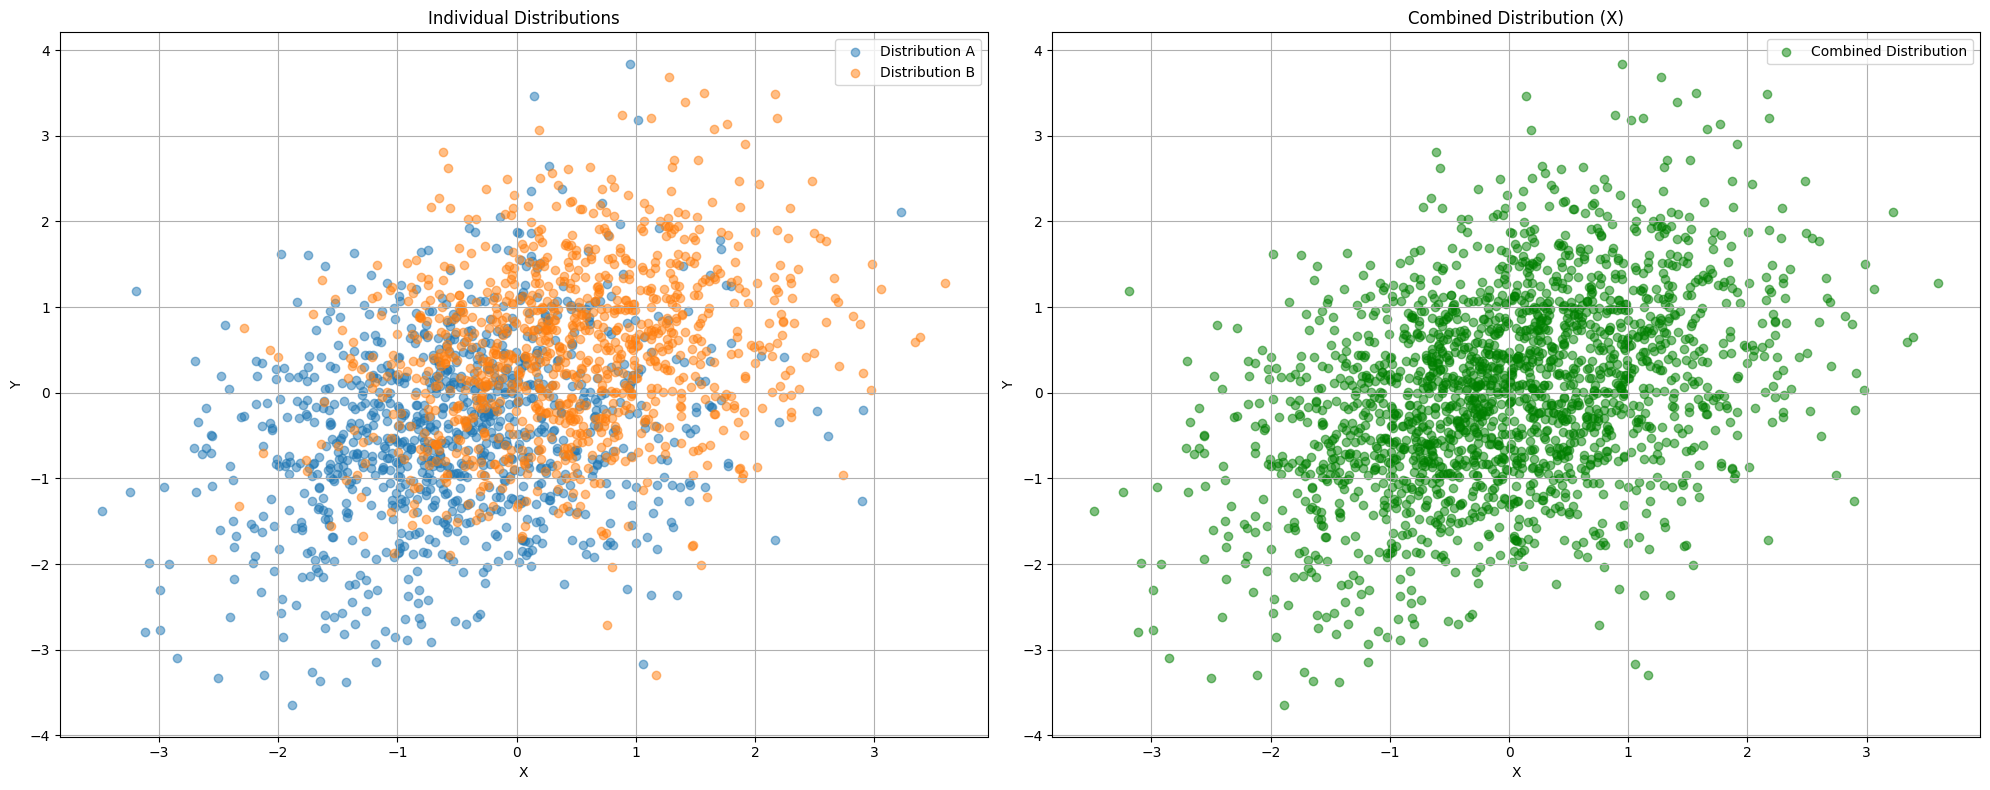

Shape of X: torch.Size([2000, 2])


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Define parameters
m = 1000  # number of samples
mu_A = torch.tensor([-0.5, -0.5])
mu_B = torch.tensor([0.5, 0.5])
cov = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

# Generate samples
dist_A = torch.distributions.MultivariateNormal(mu_A, cov)
dist_B = torch.distributions.MultivariateNormal(mu_B, cov)

samples_A = dist_A.sample((m,))
samples_B = dist_B.sample((m,))

# Stack samples into a single tensor
X = torch.cat((samples_A, samples_B), dim=0)

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot individual distributions
ax1.scatter(samples_A[:, 0], samples_A[:, 1], alpha=0.5, label='Distribution A')
ax1.scatter(samples_B[:, 0], samples_B[:, 1], alpha=0.5, label='Distribution B')
ax1.set_title('Individual Distributions')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()
ax1.grid(True)

# Plot combined tensor X
ax2.scatter(X[:, 0], X[:, 1], alpha=0.5, c='green', label='Combined Distribution')
ax2.set_title('Combined Distribution (X)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print the shape of the stacked tensor X
print(f"Shape of X: {X.shape}")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
players = pd.read_csv("players_22.csv")